In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings


from sklearn.datasets import make_classification 
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter

from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
# Load the data
import os 
file_path = os.path.join("Resources","njhome_floodsummary.csv")
#file_path = Path('.\Resources\Newbrunswick_ML.csv')
df = pd.read_csv(file_path,encoding="utf-8")
df

,CITY,LATITUDE,LONGITUDE,ELEVATION,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,Anomalypct,Anomaly,zipcode,State,CountyName,SizeRank,eom_date,avghomeprice_month,price_drop,price_drop_amt
0,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,N,7920,NJ,Somerset County,4533.0,2011-01-31,587760.0,Y,-104.0
1,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,N,8807,NJ,Somerset County,2481.0,2011-01-31,435244.0,Y,-909.0
2,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,N,8836,NJ,Somerset County,15436.0,2011-01-31,556574.0,Y,-970.0
3,Bridgewater,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,N,7920,NJ,Somerset County,4533.0,2012-01-31,576709.0,N,82.0
4,Bridgewater,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,N,8807,NJ,Somerset County,2481.0,2012-01-31,417961.0,Y,-739.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,New Brunswick,40.489649,-74.440877,12.5,12,2017,0.48,1.72,0.055484,0.279070,N,8901,NJ,Middlesex County,2082.0,2017-12-31,253629.0,N,846.0
544,New Brunswick,40.489649,-74.440877,12.5,12,2018,1.11,5.48,0.176774,0.202555,N,8901,NJ,Middlesex County,2082.0,2018-12-31,264667.0,N,286.0
545,New Brunswick,40.489649,-74.440877,12.5,12,2019,1.31,7.14,0.230323,0.183473,N,8901,NJ,Middlesex County,2082.0,2019-12-31,282405.0,N,3946.0
546,New Brunswick,40.489649,-74.440877,12.5,12,2020,1.22,5.24,0.174667,0.232824,N,8901,NJ,Middlesex County,2082.0,2020-12-31,311080.0,N,3470.0


In [3]:
# Learn more about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CITY                   548 non-null    object 
 1   LATITUDE               548 non-null    float64
 2   LONGITUDE              548 non-null    float64
 3   ELEVATION              548 non-null    float64
 4   month                  548 non-null    int64  
 5   year                   548 non-null    int64  
 6   city_max_day_rain      548 non-null    float64
 7   city_month_total_rain  548 non-null    float64
 8   city_avg_daily_rain    548 non-null    float64
 9   Anomalypct             548 non-null    float64
 10  Anomaly                548 non-null    object 
 11  zipcode                548 non-null    int64  
 12  State                  548 non-null    object 
 13  CountyName             548 non-null    object 
 14  SizeRank               548 non-null    float64
 15  eom_da

In [4]:
df['price_drop'].replace(['Y','N'],[1,0],inplace=True)

In [5]:
df

,CITY,LATITUDE,LONGITUDE,ELEVATION,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,Anomalypct,Anomaly,zipcode,State,CountyName,SizeRank,eom_date,avghomeprice_month,price_drop,price_drop_amt
0,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,N,7920,NJ,Somerset County,4533.0,2011-01-31,587760.0,1,-104.0
1,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,N,8807,NJ,Somerset County,2481.0,2011-01-31,435244.0,1,-909.0
2,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,N,8836,NJ,Somerset County,15436.0,2011-01-31,556574.0,1,-970.0
3,Bridgewater,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,N,7920,NJ,Somerset County,4533.0,2012-01-31,576709.0,0,82.0
4,Bridgewater,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,N,8807,NJ,Somerset County,2481.0,2012-01-31,417961.0,1,-739.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,New Brunswick,40.489649,-74.440877,12.5,12,2017,0.48,1.72,0.055484,0.279070,N,8901,NJ,Middlesex County,2082.0,2017-12-31,253629.0,0,846.0
544,New Brunswick,40.489649,-74.440877,12.5,12,2018,1.11,5.48,0.176774,0.202555,N,8901,NJ,Middlesex County,2082.0,2018-12-31,264667.0,0,286.0
545,New Brunswick,40.489649,-74.440877,12.5,12,2019,1.31,7.14,0.230323,0.183473,N,8901,NJ,Middlesex County,2082.0,2019-12-31,282405.0,0,3946.0
546,New Brunswick,40.489649,-74.440877,12.5,12,2020,1.22,5.24,0.174667,0.232824,N,8901,NJ,Middlesex County,2082.0,2020-12-31,311080.0,0,3470.0


In [6]:
df['Anomaly'].replace(['Y','N'],[1,0],inplace=True)

In [7]:
df

,CITY,LATITUDE,LONGITUDE,ELEVATION,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,Anomalypct,Anomaly,zipcode,State,CountyName,SizeRank,eom_date,avghomeprice_month,price_drop,price_drop_amt
0,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,7920,NJ,Somerset County,4533.0,2011-01-31,587760.0,1,-104.0
1,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8807,NJ,Somerset County,2481.0,2011-01-31,435244.0,1,-909.0
2,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8836,NJ,Somerset County,15436.0,2011-01-31,556574.0,1,-970.0
3,Bridgewater,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,7920,NJ,Somerset County,4533.0,2012-01-31,576709.0,0,82.0
4,Bridgewater,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,8807,NJ,Somerset County,2481.0,2012-01-31,417961.0,1,-739.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,New Brunswick,40.489649,-74.440877,12.5,12,2017,0.48,1.72,0.055484,0.279070,0,8901,NJ,Middlesex County,2082.0,2017-12-31,253629.0,0,846.0
544,New Brunswick,40.489649,-74.440877,12.5,12,2018,1.11,5.48,0.176774,0.202555,0,8901,NJ,Middlesex County,2082.0,2018-12-31,264667.0,0,286.0
545,New Brunswick,40.489649,-74.440877,12.5,12,2019,1.31,7.14,0.230323,0.183473,0,8901,NJ,Middlesex County,2082.0,2019-12-31,282405.0,0,3946.0
546,New Brunswick,40.489649,-74.440877,12.5,12,2020,1.22,5.24,0.174667,0.232824,0,8901,NJ,Middlesex County,2082.0,2020-12-31,311080.0,0,3470.0


In [8]:
df.drop('eom_date', axis=1, inplace=True)
df

,CITY,LATITUDE,LONGITUDE,ELEVATION,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,Anomalypct,Anomaly,zipcode,State,CountyName,SizeRank,avghomeprice_month,price_drop,price_drop_amt
0,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,7920,NJ,Somerset County,4533.0,587760.0,1,-104.0
1,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8807,NJ,Somerset County,2481.0,435244.0,1,-909.0
2,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8836,NJ,Somerset County,15436.0,556574.0,1,-970.0
3,Bridgewater,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,7920,NJ,Somerset County,4533.0,576709.0,0,82.0
4,Bridgewater,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,8807,NJ,Somerset County,2481.0,417961.0,1,-739.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,New Brunswick,40.489649,-74.440877,12.5,12,2017,0.48,1.72,0.055484,0.279070,0,8901,NJ,Middlesex County,2082.0,253629.0,0,846.0
544,New Brunswick,40.489649,-74.440877,12.5,12,2018,1.11,5.48,0.176774,0.202555,0,8901,NJ,Middlesex County,2082.0,264667.0,0,286.0
545,New Brunswick,40.489649,-74.440877,12.5,12,2019,1.31,7.14,0.230323,0.183473,0,8901,NJ,Middlesex County,2082.0,282405.0,0,3946.0
546,New Brunswick,40.489649,-74.440877,12.5,12,2020,1.22,5.24,0.174667,0.232824,0,8901,NJ,Middlesex County,2082.0,311080.0,0,3470.0


In [9]:
import numpy as np
import pandas as pd

df['CountyName'] = df['CountyName'].replace('Middlesex County', 1)


df

,CITY,LATITUDE,LONGITUDE,ELEVATION,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,Anomalypct,Anomaly,zipcode,State,CountyName,SizeRank,avghomeprice_month,price_drop,price_drop_amt
0,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,7920,NJ,Somerset County,4533.0,587760.0,1,-104.0
1,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8807,NJ,Somerset County,2481.0,435244.0,1,-909.0
2,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8836,NJ,Somerset County,15436.0,556574.0,1,-970.0
3,Bridgewater,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,7920,NJ,Somerset County,4533.0,576709.0,0,82.0
4,Bridgewater,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,8807,NJ,Somerset County,2481.0,417961.0,1,-739.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,New Brunswick,40.489649,-74.440877,12.5,12,2017,0.48,1.72,0.055484,0.279070,0,8901,NJ,1,2082.0,253629.0,0,846.0
544,New Brunswick,40.489649,-74.440877,12.5,12,2018,1.11,5.48,0.176774,0.202555,0,8901,NJ,1,2082.0,264667.0,0,286.0
545,New Brunswick,40.489649,-74.440877,12.5,12,2019,1.31,7.14,0.230323,0.183473,0,8901,NJ,1,2082.0,282405.0,0,3946.0
546,New Brunswick,40.489649,-74.440877,12.5,12,2020,1.22,5.24,0.174667,0.232824,0,8901,NJ,1,2082.0,311080.0,0,3470.0


In [10]:
df['CITY'] = df['CITY'].replace('New Brunswick', 1)
df

,CITY,LATITUDE,LONGITUDE,ELEVATION,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,Anomalypct,Anomaly,zipcode,State,CountyName,SizeRank,avghomeprice_month,price_drop,price_drop_amt
0,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,7920,NJ,Somerset County,4533.0,587760.0,1,-104.0
1,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8807,NJ,Somerset County,2481.0,435244.0,1,-909.0
2,Bridgewater,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8836,NJ,Somerset County,15436.0,556574.0,1,-970.0
3,Bridgewater,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,7920,NJ,Somerset County,4533.0,576709.0,0,82.0
4,Bridgewater,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,8807,NJ,Somerset County,2481.0,417961.0,1,-739.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,40.489649,-74.440877,12.5,12,2017,0.48,1.72,0.055484,0.279070,0,8901,NJ,1,2082.0,253629.0,0,846.0
544,1,40.489649,-74.440877,12.5,12,2018,1.11,5.48,0.176774,0.202555,0,8901,NJ,1,2082.0,264667.0,0,286.0
545,1,40.489649,-74.440877,12.5,12,2019,1.31,7.14,0.230323,0.183473,0,8901,NJ,1,2082.0,282405.0,0,3946.0
546,1,40.489649,-74.440877,12.5,12,2020,1.22,5.24,0.174667,0.232824,0,8901,NJ,1,2082.0,311080.0,0,3470.0


In [11]:
df['CITY'] = df['CITY'].replace('Bridgewater',2)
df

,CITY,LATITUDE,LONGITUDE,ELEVATION,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,Anomalypct,Anomaly,zipcode,State,CountyName,SizeRank,avghomeprice_month,price_drop,price_drop_amt
0,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,7920,NJ,Somerset County,4533.0,587760.0,1,-104.0
1,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8807,NJ,Somerset County,2481.0,435244.0,1,-909.0
2,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8836,NJ,Somerset County,15436.0,556574.0,1,-970.0
3,2,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,7920,NJ,Somerset County,4533.0,576709.0,0,82.0
4,2,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,8807,NJ,Somerset County,2481.0,417961.0,1,-739.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,40.489649,-74.440877,12.5,12,2017,0.48,1.72,0.055484,0.279070,0,8901,NJ,1,2082.0,253629.0,0,846.0
544,1,40.489649,-74.440877,12.5,12,2018,1.11,5.48,0.176774,0.202555,0,8901,NJ,1,2082.0,264667.0,0,286.0
545,1,40.489649,-74.440877,12.5,12,2019,1.31,7.14,0.230323,0.183473,0,8901,NJ,1,2082.0,282405.0,0,3946.0
546,1,40.489649,-74.440877,12.5,12,2020,1.22,5.24,0.174667,0.232824,0,8901,NJ,1,2082.0,311080.0,0,3470.0


In [12]:
df['State'] = df['State'].replace('NJ', 1)


df

,CITY,LATITUDE,LONGITUDE,ELEVATION,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,Anomalypct,Anomaly,zipcode,State,CountyName,SizeRank,avghomeprice_month,price_drop,price_drop_amt
0,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,7920,1,Somerset County,4533.0,587760.0,1,-104.0
1,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8807,1,Somerset County,2481.0,435244.0,1,-909.0
2,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8836,1,Somerset County,15436.0,556574.0,1,-970.0
3,2,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,7920,1,Somerset County,4533.0,576709.0,0,82.0
4,2,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,8807,1,Somerset County,2481.0,417961.0,1,-739.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,40.489649,-74.440877,12.5,12,2017,0.48,1.72,0.055484,0.279070,0,8901,1,1,2082.0,253629.0,0,846.0
544,1,40.489649,-74.440877,12.5,12,2018,1.11,5.48,0.176774,0.202555,0,8901,1,1,2082.0,264667.0,0,286.0
545,1,40.489649,-74.440877,12.5,12,2019,1.31,7.14,0.230323,0.183473,0,8901,1,1,2082.0,282405.0,0,3946.0
546,1,40.489649,-74.440877,12.5,12,2020,1.22,5.24,0.174667,0.232824,0,8901,1,1,2082.0,311080.0,0,3470.0


In [13]:
df.drop('price_drop_amt', axis=1, inplace=True)
df

,CITY,LATITUDE,LONGITUDE,ELEVATION,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,Anomalypct,Anomaly,zipcode,State,CountyName,SizeRank,avghomeprice_month,price_drop
0,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,7920,1,Somerset County,4533.0,587760.0,1
1,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8807,1,Somerset County,2481.0,435244.0,1
2,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8836,1,Somerset County,15436.0,556574.0,1
3,2,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,7920,1,Somerset County,4533.0,576709.0,0
4,2,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,8807,1,Somerset County,2481.0,417961.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,40.489649,-74.440877,12.5,12,2017,0.48,1.72,0.055484,0.279070,0,8901,1,1,2082.0,253629.0,0
544,1,40.489649,-74.440877,12.5,12,2018,1.11,5.48,0.176774,0.202555,0,8901,1,1,2082.0,264667.0,0
545,1,40.489649,-74.440877,12.5,12,2019,1.31,7.14,0.230323,0.183473,0,8901,1,1,2082.0,282405.0,0
546,1,40.489649,-74.440877,12.5,12,2020,1.22,5.24,0.174667,0.232824,0,8901,1,1,2082.0,311080.0,0


In [14]:
df['CITY'] = df['CITY'].replace('Bridgewater',2)
df

,CITY,LATITUDE,LONGITUDE,ELEVATION,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,Anomalypct,Anomaly,zipcode,State,CountyName,SizeRank,avghomeprice_month,price_drop
0,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,7920,1,Somerset County,4533.0,587760.0,1
1,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8807,1,Somerset County,2481.0,435244.0,1
2,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8836,1,Somerset County,15436.0,556574.0,1
3,2,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,7920,1,Somerset County,4533.0,576709.0,0
4,2,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,8807,1,Somerset County,2481.0,417961.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,40.489649,-74.440877,12.5,12,2017,0.48,1.72,0.055484,0.279070,0,8901,1,1,2082.0,253629.0,0
544,1,40.489649,-74.440877,12.5,12,2018,1.11,5.48,0.176774,0.202555,0,8901,1,1,2082.0,264667.0,0
545,1,40.489649,-74.440877,12.5,12,2019,1.31,7.14,0.230323,0.183473,0,8901,1,1,2082.0,282405.0,0
546,1,40.489649,-74.440877,12.5,12,2020,1.22,5.24,0.174667,0.232824,0,8901,1,1,2082.0,311080.0,0


In [15]:
df['CountyName'] = df['CountyName'].replace('Somerset County', 2)


df

,CITY,LATITUDE,LONGITUDE,ELEVATION,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,Anomalypct,Anomaly,zipcode,State,CountyName,SizeRank,avghomeprice_month,price_drop
0,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,7920,1,2,4533.0,587760.0,1
1,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8807,1,2,2481.0,435244.0,1
2,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8836,1,2,15436.0,556574.0,1
3,2,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,7920,1,2,4533.0,576709.0,0
4,2,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,8807,1,2,2481.0,417961.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,40.489649,-74.440877,12.5,12,2017,0.48,1.72,0.055484,0.279070,0,8901,1,1,2082.0,253629.0,0
544,1,40.489649,-74.440877,12.5,12,2018,1.11,5.48,0.176774,0.202555,0,8901,1,1,2082.0,264667.0,0
545,1,40.489649,-74.440877,12.5,12,2019,1.31,7.14,0.230323,0.183473,0,8901,1,1,2082.0,282405.0,0
546,1,40.489649,-74.440877,12.5,12,2020,1.22,5.24,0.174667,0.232824,0,8901,1,1,2082.0,311080.0,0


In [16]:
df.columns

Index(['CITY', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'month', 'year',
       'city_max_day_rain', 'city_month_total_rain', 'city_avg_daily_rain',
       'Anomalypct', 'Anomaly', 'zipcode', 'State', 'CountyName', 'SizeRank',
       'avghomeprice_month', 'price_drop'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CITY                   548 non-null    int64  
 1   LATITUDE               548 non-null    float64
 2   LONGITUDE              548 non-null    float64
 3   ELEVATION              548 non-null    float64
 4   month                  548 non-null    int64  
 5   year                   548 non-null    int64  
 6   city_max_day_rain      548 non-null    float64
 7   city_month_total_rain  548 non-null    float64
 8   city_avg_daily_rain    548 non-null    float64
 9   Anomalypct             548 non-null    float64
 10  Anomaly                548 non-null    int64  
 11  zipcode                548 non-null    int64  
 12  State                  548 non-null    int64  
 13  CountyName             548 non-null    int64  
 14  SizeRank               548 non-null    float64
 15  avghom

In [18]:
X = df[[ 'CITY','ELEVATION','month','year','city_month_total_rain','Anomalypct','avghomeprice_month'
      ]]
y = df['price_drop']

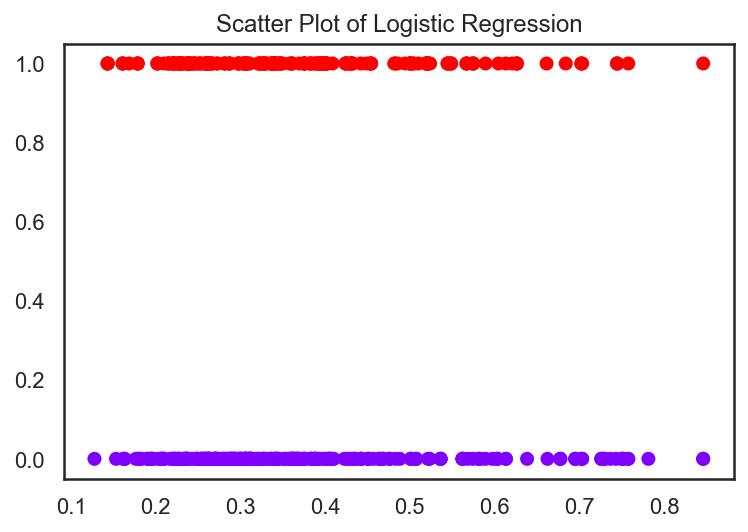

In [19]:
# visualize the Data

X = df[ 'Anomalypct']
y = df['price_drop']
plt.scatter(X, y,c=y,cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')

plt.show()

In [20]:
#X = df[[ 'city','elevation','month','year','city_month_total_rain','anomalypct','avg_home_price'
#      ]]
X = X = df [['CITY', 'ELEVATION', 'month', 'year',
       'city_month_total_rain', 
       'Anomalypct', 
       'avghomeprice_month']]
y = df['price_drop']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,stratify=y)

In [23]:
X_train.shape

(411, 7)

# LOGISTIC REGRESSION

In [24]:
from sklearn.linear_model import LogisticRegression


In [25]:
#Perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [26]:
#Perform prediction using the test Dataset
y_pred =log_reg.predict(X_test)
results =pd.DataFrame({"Prediction":y_pred,"Actual" : y_test}).reset_index(drop=True)
results

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
132,0,0
133,0,0
134,0,1
135,0,0


In [27]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test,y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,81,0
Actual 1,56,0


In [28]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.5912408759124088


# the Decision Tree Model

In [29]:
import pandas as pd

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [30]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train_scaled, y_train)

Make Predictions Using the Testing Data

In [32]:
# Making predictions using the testing data.
predictions = model.predict(X_test_scaled)
print(predictions) 

[0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0
 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1]


Evaluate the Model

In [33]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,67,14
Actual 1,13,43


In [34]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.8029197080291971


In [35]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,67,14
Actual 1,13,43


Accuracy Score : 0.8029197080291971
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        81
           1       0.75      0.77      0.76        56

    accuracy                           0.80       137
   macro avg       0.80      0.80      0.80       137
weighted avg       0.80      0.80      0.80       137



# RANDOM FOREST MODEL -ensemble learning 

In [36]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Loading data

In [37]:
df

,CITY,LATITUDE,LONGITUDE,ELEVATION,month,year,city_max_day_rain,city_month_total_rain,city_avg_daily_rain,Anomalypct,Anomaly,zipcode,State,CountyName,SizeRank,avghomeprice_month,price_drop
0,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,7920,1,2,4533.0,587760.0,1
1,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8807,1,2,2481.0,435244.0,1
2,2,40.626247,-74.653535,32.9,1,2011,1.25,3.18,0.106000,0.393082,0,8836,1,2,15436.0,556574.0,1
3,2,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,7920,1,2,4533.0,576709.0,0
4,2,40.626247,-74.653535,32.9,1,2012,1.10,3.05,0.098387,0.360656,0,8807,1,2,2481.0,417961.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,40.489649,-74.440877,12.5,12,2017,0.48,1.72,0.055484,0.279070,0,8901,1,1,2082.0,253629.0,0
544,1,40.489649,-74.440877,12.5,12,2018,1.11,5.48,0.176774,0.202555,0,8901,1,1,2082.0,264667.0,0
545,1,40.489649,-74.440877,12.5,12,2019,1.31,7.14,0.230323,0.183473,0,8901,1,1,2082.0,282405.0,0
546,1,40.489649,-74.440877,12.5,12,2020,1.22,5.24,0.174667,0.232824,0,8901,1,1,2082.0,311080.0,0


In [38]:
# Define the target set.
y = df["price_drop"].values
y[:5]

array([1, 1, 1, 0, 1], dtype=int64)

split into the training and testing sets.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [40]:
# Determine the shape of our training and testing sets.
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(137, 7)
(411,)
(137,)


In [41]:
# Splitting into Train and Test sets into an 80/20 split.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=78, train_size=0.80)

In [42]:
# Determine the shape of our training and testing sets.
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(438, 7)
(110, 7)
(438,)
(110,)


create the StandardScaler instance

In [43]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Fit the Random Forest Model

In [44]:

# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 


In [45]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [46]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [47]:
print(predictions)

[0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1]


Evaluate the Model

In [48]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,72,6
Actual 1,17,42


Using the equation (TP + TN) / Total, we can determine our accuracy

In [49]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.8321167883211679


In [50]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,72,6
Actual 1,17,42


Accuracy Score : 0.8321167883211679
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        78
           1       0.88      0.71      0.79        59

    accuracy                           0.83       137
   macro avg       0.84      0.82      0.82       137
weighted avg       0.84      0.83      0.83       137



# Rank the Importance of Features#

In [51]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.01233577, 0.01042029, 0.11632184, 0.24015627, 0.18402527,
       0.19950475, 0.23723581])

In [52]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.24015627453179084, 'year'),
 (0.23723581138264804, 'avghomeprice_month'),
 (0.19950474894836076, 'Anomalypct'),
 (0.18402526930943405, 'city_month_total_rain'),
 (0.11632184064232612, 'month'),
 (0.012335769961870177, 'CITY'),
 (0.010420285223569928, 'ELEVATION')]

In [53]:
import joblib

In [54]:
joblib.dump(rf_model, "finalProject_rf_model.joblib")

['finalProject_rf_model.joblib']

In [55]:
rf_loaded_model = joblib.load("finalProject_rf_model.joblib")

In [56]:
sorted(zip(rf_loaded_model.feature_importances_, X.columns), reverse=True)

[(0.24015627453179084, 'year'),
 (0.23723581138264804, 'avghomeprice_month'),
 (0.19950474894836076, 'Anomalypct'),
 (0.18402526930943405, 'city_month_total_rain'),
 (0.11632184064232612, 'month'),
 (0.012335769961870177, 'CITY'),
 (0.010420285223569928, 'ELEVATION')]

In [57]:
rf_loaded_model.predict(X_test_scaled)

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1], dtype=int64)

In [58]:
rf_model.predict(X_test_scaled)-rf_model.predict(X_test_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [59]:
X_test

,CITY,ELEVATION,month,year,city_month_total_rain,Anomalypct,avghomeprice_month
135,2,32.9,4,2020,4.19,0.326969,622288.0
44,2,32.9,2,2013,2.58,0.341085,543643.0
293,2,32.9,9,2015,2.17,0.520737,566748.0
414,1,12.5,1,2014,2.39,0.196653,219179.0
437,1,12.5,3,2013,2.19,0.356164,206598.0
...,...,...,...,...,...,...,...
102,2,32.9,3,2021,3.73,0.359249,649220.0
274,2,32.9,8,2020,6.80,0.257353,470568.0
63,2,32.9,2,2020,3.37,0.237389,618620.0
477,1,12.5,6,2017,4.84,0.369835,243859.0


In [60]:
# Calculate feature importance in the Decision Tree model.
importances =model.feature_importances_
importances

array([0.        , 0.        , 0.08741077, 0.23193017, 0.20892129,
       0.22748575, 0.24425201])

In [61]:
# We can sort the features by their importance.
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.24425201274867894, 'avghomeprice_month'),
 (0.231930173409041, 'year'),
 (0.22748575342712038, 'Anomalypct'),
 (0.20892128954733424, 'city_month_total_rain'),
 (0.08741077086782532, 'month'),
 (0.0, 'ELEVATION'),
 (0.0, 'CITY')]